In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as soc 
from sigfig import round
from scipy import constants as const
from scipy.odr import *


def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [2]:
#Konstanten definieren
L = 0.07 # in m 
l = 0.455 # in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

In [3]:
#Daten der B-Felder importieren
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

In [4]:
#Definieren der notierten Daten

#Temperatur [K]
T = np.array([458.15,459.15,459.15,459.15,459.15,459.15,459.15,459.15,459.15,459.15])
uTS = np.array([0,1,1,1,1,1,1,1,1,0])   #Schwankung der T 
uT1 = 1/(2*np.sqrt(3))                                  #Ableseungenauigkeit

#Spulenstrom [A]
I = [0.33,0.39,0.46,0.51,0.58,0.66,0.73,0.81,0.87,0.96]
uA = 0.01/(2*np.sqrt(3))                                #Ableseungenauigkeit
uIS = [0.0,1,0,0,0,0,0,0,0,0]         #Schwankung von I 

#Positionen der Spindel [Schritte]
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

In [5]:
#Unsicherheit des Ofens berechnen 
a = 1
u_Ofen = np.sqrt(((a)/(2 * np.sqrt(3)))**2+(3)**2)

#Umrechnung in mu m
u_OfG = u_Ofen*10.5

C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users

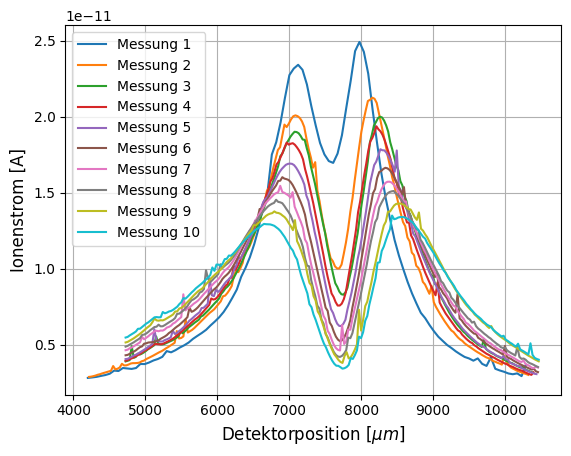

In [6]:
#Lineares Modell
def linear(m:float,b:float,x:np.ndarray):
    return m*x+b

#Offset berechen
bc = []

for  i in range(len(xcalib)):
    popt,_ = soc.curve_fit(linear,xcalib[i],ycalib[i])
    
    #Fit anwenden und umrechnen in mu m
    bc.append((popt[1]*bfields[i][:,0]+popt[0])*10.5)
    
    #plt.plot(bfields[i][:,0]*10.5,bfields[i][:,1], label="Daten vor Korrektur")
    #plt.plot((popt[1]*bfields[i][:,0]+popt[0])*10.5,bfields[i][:,1],label="Daten nach der Korrektur")
    plt.plot((popt[1]*bfields[i][:,0]+popt[0])*10.5,bfields[i][:,1],label="Messung "+str(i+1))
    
    plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("Plots/AlleMessungen.pdf")
    #plt.savefig("Plots/Korrektur-x-Achse.pdf")

In [7]:
#Gauß-Funktion mit zwei Spitzenwerten definieren
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2)
        + b * np.exp(-(np.abs(x-mu2)/(np.sqrt(2)*sigma2))**2)
    )

In [8]:
#Gauß-Funktion mit zwei Spitzenwerten definieren
def gaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,y0=float): 
    return (y0 + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2))

In [9]:
#Funktion um die Daten mit einer Doppel-Gauß-Funktion zu fitten
def fitdoublegaussian(x:np.ndarray,y:np.ndarray,p0:float,ue:np.ndarray,uue:np.ndarray):
    x,y = x,y
    popt1,pcov1 = soc.curve_fit(doublegaussian,x,y,p0=p0)
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt1[4])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = (np.abs(mean-popt1[1]))
    ue.append(dprint*10**(-6))
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt1[5])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = (np.sqrt((0.5*up1 )**2 + (0.5*up2)**2))
    uue.append(ud*10**(-6))

    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt1[4],2), "$\pm$", np.round(up1, 2), " & ", round(dprint,sigfigs=6), "$\pm$", round(ud,sigfigs =6), "\\"+"\\","\hline")
        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    #plt.scatter(x,y,label="Daten",s=2,c="red")
    #plt.plot(x,doublegaussian(x,*popt1),label="Fit")
    #plt.legend(loc=0)
    #plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    #plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    #plt.grid(True, which = "major")
    #plt.savefig("plots/wrongdoublegauss.pdf")
    #plt.show()

In [10]:
#Funktion um die Daten mit einer Doppel-Gauß-Funktion zu fitten
def fitgaussian(x:np.ndarray,y:np.ndarray,x1,x2,x3,x4,p0:float,ue:np.ndarray,uue:np.ndarray):
    xnew,xnew2 = x[x1:x2],x[x3:x4]
    ynew,ynew2 = y[x1:x2],y[x3:x4]
    p1 = p0[0:4]
    p2 = p0[4:8]
    popt1,pcov1 = soc.curve_fit(gaussian,xnew,ynew,p0=[p1])
    popt2,pcov2 = soc.curve_fit(gaussian,xnew2,ynew2,p0=[p2])
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt2[1])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = (np.abs(mean-popt1[1]))
    ue.append(dprint*10**(-6))
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt2[2])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = (np.sqrt((0.5*up1 )**2 + (0.5*up2)**2))
    uue.append(ud*10**(-6))

    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt2[1],2), "$\pm$", np.round(up1, 2), " & ", round(dprint,sigfigs=6), "$\pm$", round(ud,sigfigs =6), "\\"+"\\","\hline")
        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    plt.scatter(x,y,label="Daten",s=2,c="red")
    plt.plot(x,gaussian(x,*popt1),label="Fit1")
    plt.plot(x,gaussian(x,*popt2),label="Fit2")
    plt.legend(loc=0)
    plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    plt.grid(True, which = "major")
    plt.savefig("plots/wrongdoublegauss.pdf")
    plt.show()
    print(p1,p2)

1& 6896.37 $\pm$ 427.16  &  8359.72 $\pm$ 427.16  &  731.676 $\pm$ 258.89 \\ \hline


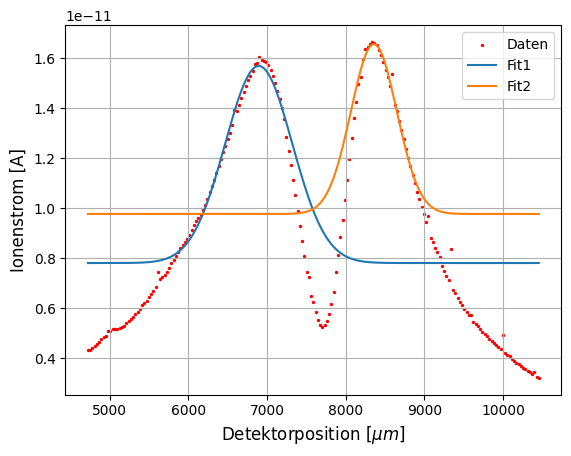

(1.1999999999999999e-11, 6825.0, 52.5, 2e-11) (1.2499999999999999e-11, 8505.0, 52.5, 2e-11)
1& 6829.84 $\pm$ 404.43  &  8393.92 $\pm$ 404.43  &  782.039 $\pm$ 256.75 \\ \hline


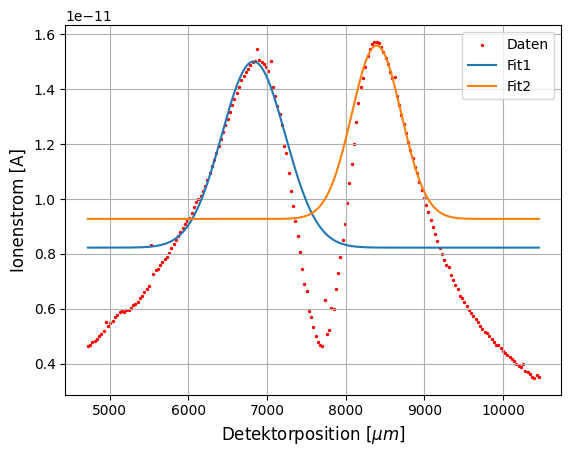

(1.1999999999999999e-11, 6825.0, 52.5, 2e-11) (1.2499999999999999e-11, 8505.0, 52.5, 2e-11)
1& 6843.24 $\pm$ 481.74  &  8449.04 $\pm$ 481.74  &  802.899 $\pm$ 268.673 \\ \hline


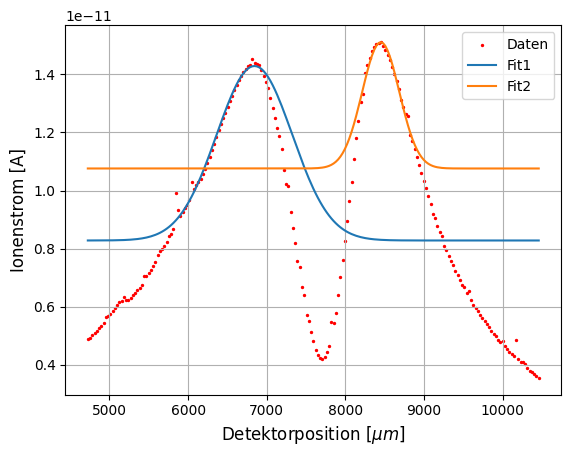

(1.1999999999999999e-11, 6825.0, 52.5, 2e-11) (1.2499999999999999e-11, 8505.0, 52.5, 2e-11)
1& 6791.88 $\pm$ 457.58  &  8557.96 $\pm$ 457.58  &  883.041 $\pm$ 318.392 \\ \hline


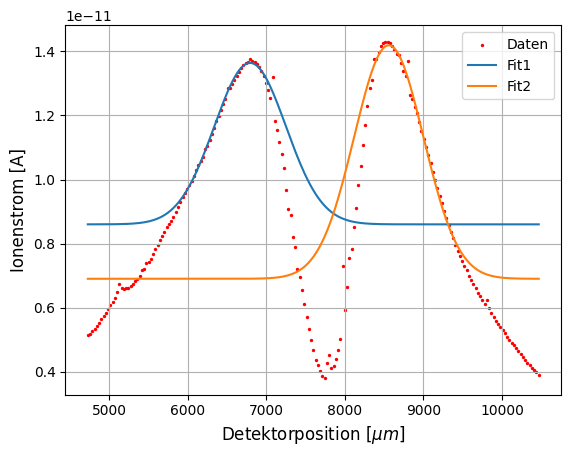

(1.1999999999999999e-11, 6825.0, 52.5, 2e-11) (1.2499999999999999e-11, 8505.0, 52.5, 2e-11)
1& 6678.3 $\pm$ 368.73  &  8602.45 $\pm$ 368.73  &  962.074 $\pm$ 275.676 \\ \hline


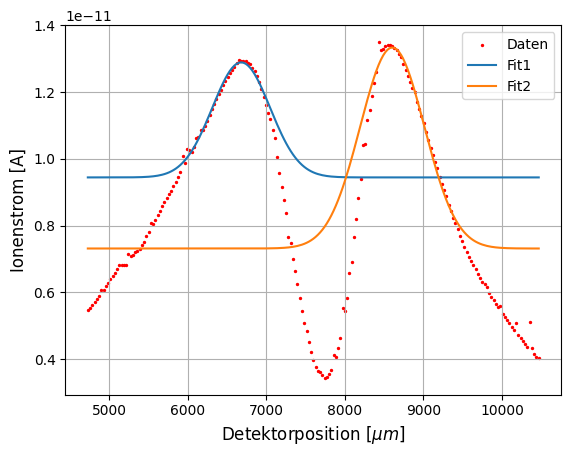

(1.1999999999999999e-11, 6825.0, 52.5, 2e-11) (1.2499999999999999e-11, 8505.0, 52.5, 2e-11)


In [12]:
#Deeein fuckng job tu was für dein geld du nutte
d,ud = [],[] 




fitgaussian(bc[6],bf7[:,1],35,90,120,145, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[6],bf8[:,1],35,90,130,145, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[7],bf9[:,1],35,80,120,145, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[8],bf10[:,1],40,80,125,165, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[9],bf11[:,1],40,80,125,165, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)


ue = np.array(d)
uue = np.array(ud)

In [13]:
#Unsicherheit der Temperatur berechnen
uT = np.array([])
for i in np.arange(0, len(uTS)):
    uT = np.append(uT,np.sqrt((uT1)**2 + (uTS[i])**2))
print(T,uT)

[458.15 459.15 459.15 459.15 459.15 459.15 459.15 459.15 459.15 459.15] [0.28867513 1.040833   1.040833   1.040833   1.040833   1.040833
 1.040833   1.040833   1.040833   0.28867513]


In [14]:
#Unsicherheit von Stromstärke berechnen
uI = np.array([])
for i in np.arange(0,len(I)):
    uI = np.append(uI,np.sqrt((uA)**2 + (uIS[i])**2))
print(I,uI)

[0.33, 0.39, 0.46, 0.51, 0.58, 0.66, 0.73, 0.81, 0.87, 0.96] [0.00288675 1.00000417 0.00288675 0.00288675 0.00288675 0.00288675
 0.00288675 0.00288675 0.00288675 0.00288675]


In [15]:
#Approximieren des B-Feldes
B, uB = np.array([]),np.array([])
for i in np.arange(0,len(I)):
    B = np.append(B,(-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 - 0.24218 * I[i]**3))
    uB = np.append(uB,(np.sqrt((( 0.55713 + 2 * 0.26883 * I[i]- 3 * 0.24218 * I[i]**2) * uI[i])**2)))
print(B,uB)

[0.19930526 0.23868387 0.2844714  0.31681356 0.36119759 0.41006237
 0.45063227 0.49383028 0.52358427 0.56321316] [0.00189209 0.6563134  0.00187846 0.00185434 0.00180296 0.00171907
 0.00162365 0.00148942 0.00137114 0.00116539]


In [16]:
#Gradient des B-Feldes berechnen 
dB,udB = np.array([]),np.array([])
for i in np.arange(0,len(B)):
    dB = np.append(dB,(B[i] * eps)/(a))
    udB = np.append(udB,np.sqrt(((eps)/(a)*uB[i])**2 + ((B[i]/a) * ueps)**2))
print(dB)
print(udB)

[0.19252889 0.23056862 0.27479937 0.3060419  0.34891687 0.39612025
 0.43531077 0.47704005 0.50578241 0.54406392]
[0.00493497 0.63402251 0.00678981 0.00750366 0.00848815 0.00957651
 0.01048255 0.01144886 0.01211506 0.01300273]


In [17]:
#Printen der Werte als Latex Tabelle
# for i in range(len(B)):
#         print(i+1,'&', np.round(T[i],2), "$\pm$", round(uT[i], sigfigs = 2), "&", np.round(I[i],4), "$\pm$", round(uI[i],sigfigs =2), "&", np.round(B[i],4), "$\pm$",round(uB[i],sigfigs = 2), "&",
#           np.round(dB[i],2), "$\pm$",round(udB[i],sigfigs = 2), "\\\\", "\hline")

In [18]:
#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(ue)):
    x = np.append(x,dB[i] * l * L * (1-(L/(2*l))))
    y = np.append(y,ue[i]* 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.k * T[i] *uue[i]/2)**2+(ue[i] * 6 * const.k * T[i] * uT[i] )**2))

Beta: [1.72916338e-23 1.80690959e-21]
Beta Std Error: [1.64017300e-24 2.20427897e-22]
Beta Covariance: [[ 5.56786781e-45 -7.27817899e-43]
 [-7.27817899e-43  1.00564040e-40]]
Residual Variance: 0.00048315936609917104
Inverse Condition #: 0.0017188283449866809
Reason(s) for Halting:
  Sum of squares convergence


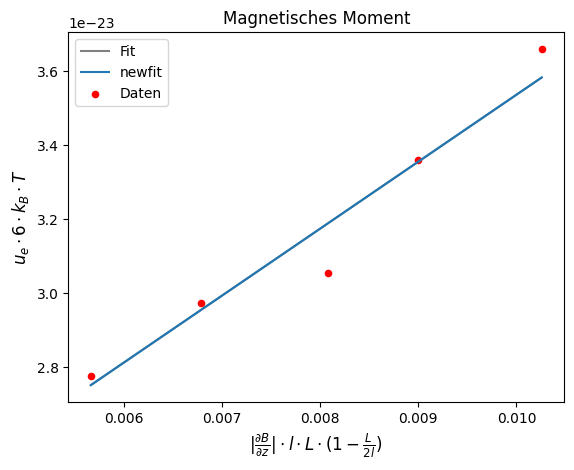

In [19]:
#Lineare Funktion
def lin_func(p, x):
    b, m = p
    return m*x + b

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)
#data = RealData(x, y)

#ODR initialize
odr = ODR(data, lin_model, beta0=[5*10**(-24), 9.2*10**(-24)])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = x
y_fit = lin_func(out.beta, x)

plt.plot(x_fit, y_fit,"-",c="gray",label="Fit")
plt.plot(x,out.beta[0]+x*out.beta[1],label="newfit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
#plt.fill_between(x_fit, y_fit - uy, y_fit + uy,color='gray', alpha=0.2)
#plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="gray",alpha=0.2,label="Messunsicherheiten")
plt.xlabel(r"$\vert\frac{\partial B}{\partial z}\vert\cdot l\cdot L\cdot (1-\frac{L}{2l})$",fontsize=12)
plt.ylabel(r"$u_e \cdot 6 \cdot k_B\cdot T$",fontsize = 12)
plt.title("Magnetisches Moment")
plt.legend(loc=0)
#plt.axes([0,0.05,1.8*10**(-23),4.3*10**(-23)])
plt.savefig("plots/magneticmoment.pdf")
plt.show()